In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat

--2023-02-16 11:28:49--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat’


train.dat             0%[                    ]       0  --.-KB/s               
train.dat           100%[===================>]  10.98K  --.-KB/s    in 0s      

2023-02-16 11:28:49 (202 MB/s) - ‘train.dat’ saved [11244/11244]

--2023-02-16 11:28:49--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat’

test.dat            100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-16 11:28:49 (237 MB/s) - ‘test.dat’ saved [2844/2844]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
# This function reads data from a given file name, returning it in a list
def read_data(file_name):
    # Open the file for reading
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    # Add each row from the file to the list
    for instance in f.readlines():
        # Skip rows with no tab delimiter
        if not re.search('\t', instance): continue
            # Map each row to a list of ints and add the dummy input for w0
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        #append
        data += [instance]
    return data

def dot_product(array1, array2):
    # Set our answer to 0
    answer = 0
    
    # Loop through the length of the arrays
    for i in range(len(array1)):
        # Add the product of the two arrays at index i to the answer
        answer += array1[i] * array2[i]
    # Return the answer
    return answer



def sigmoid(x):
    return 1 / (1 + math.exp(-x))  # The sigmoid function is defined as 1/(1+e^(-x))


def output(weights, instance):
    #TODO: return the output of the model 
    dot_prod=dot_product(weights,instance)
    return sigmoid(dot_prod)

# Predict a new instance; this is the definition of the perceptron
def predict(weights, instance):
    if sigmoid(dot_product(weights, instance)) >= 0.5:
        return 1
    return 0

# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)




# Train a perceptron with instances
#   and hyperparameters lr (leearning rate) and epochs
# The implementation comes from the definition of the perceptron
# Training consists on fitting the parameters
#   The parameters are the weights, that's the only thing training is responsible to fit
#     (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#   Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
#   so with a "decent" lr we are guaranteed to reduce the error after each iteration.
# Function to train a perceptron
def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0])-1)
    # weights = [0, 0, 0, ...,  0]

    # Iterate through the epochs
    while epochs > 0:
        # Iterate through the instances in the dataset
        for instance in instances:
            # Calculate the dot product between the weights and the instance
            in_value = dot_product(weights, instance)
            # Run the dot product through the sigmoid activation function
            output = sigmoid(in_value)
            # Run the dot product through the sigmoid activation function
            error = instance[-1] - output
            for i in range(0, len(weights)):
                #update weight
                weights[i] += lr * error * output * (1-output) * instance[i]

        epochs -= 1
        if epochs == 0:
            break

    return weights

In [ ]:
RUN IT

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
The reason we don't do this is because we want to calculate the output using the sigmoid function rather than using the predict function which simply returns a 0 or 1 based on the value of the dot product. The sigmoid function gives us a more accurate output by allowing us to fine tune the output between 0 and 1.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO Write your code below and include the output of your code.
The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with differet hyperparameters.

#### TODO Add your answer here (code and output in the format above) 

In [6]:
# Read the training and test data from the given files
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lrs = [0.005, 0.01, 0.05]              # learning rate

In [11]:
  
# Loop through all the parameters
for tr in tr_percent:
  for epochs in num_epochs:
    for lr in lrs:
        # Train the perceptron using the given parameters
      weights = train_perceptron(instances_tr, lr, epochs)
    # Calculate the accuracy of the perceptron on the testing data
      accuracy = get_accuracy(weights, instances_te)
        # Print the accuracy
      print(f"#tr: {len(instances_tr[:20]):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 77.0
#tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr:  20, epochs

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO Add your answer here (code and text)


We experiment with different combinations of hyperparameters show that there is no need to with all the training,  and dataset to get the highest accuracy with the test dataset. The accuracy of the model trained with only 20 training instances is the same as that of the model trained with 100 training instances. This suggests that the data set is small enough that the model can learn from a small portion of the data with the same accuracy.

The second run (with 200 training instances) obtains worse accuracy than the first one (with 100 training instances) because of overfitting. With more training data, the model will learn the data more accurately, but it will also become more sensitive to the noise in the data. This can lead to overfitting, where the model can no longer generalize to new data.

It is possible to get higher accuracy than 80.0 with additional hyperparameters. For example, increasing the number of epochs or the learning rate may result in higher accuracy. However, it is also possible that these changes may lead to overfitting and decreased accuracy.

It is not always worth training for more epochs while keeping all other hyperparameters fixed. The accuracy of the model may reach a plateau after a certain number of epochs, and additional epochs may not lead to a significant increase in accuracy. Moreover, additional epochs may also lead to overfitting.

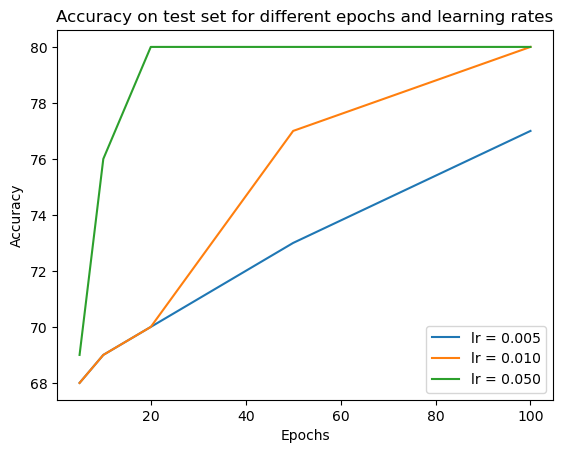

In [10]:
# Plot
import matplotlib.pyplot as plt

x = [5, 10, 20, 50, 100]
y1 = [68.0, 69.0, 70.0, 73.0, 77.0]
y2 = [68.0, 69.0, 70.0, 77.0, 80.0]
y3 = [69.0, 76.0, 80.0, 80.0, 80.0]

plt.plot(x, y1, label='lr = 0.005')
plt.plot(x, y2, label='lr = 0.010')
plt.plot(x, y3, label='lr = 0.050')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy on test set for different epochs and learning rates')

plt.legend()
plt.show()